In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [26]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')
y_test = pd.read_csv('gender_submission.csv')

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Dealing with NULL values

In [28]:
# We have 177 Null values in Age, 687 in Cabin and 2 in Embarked

In [29]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
# Lets begin with Age
# Distribution of Age among classes

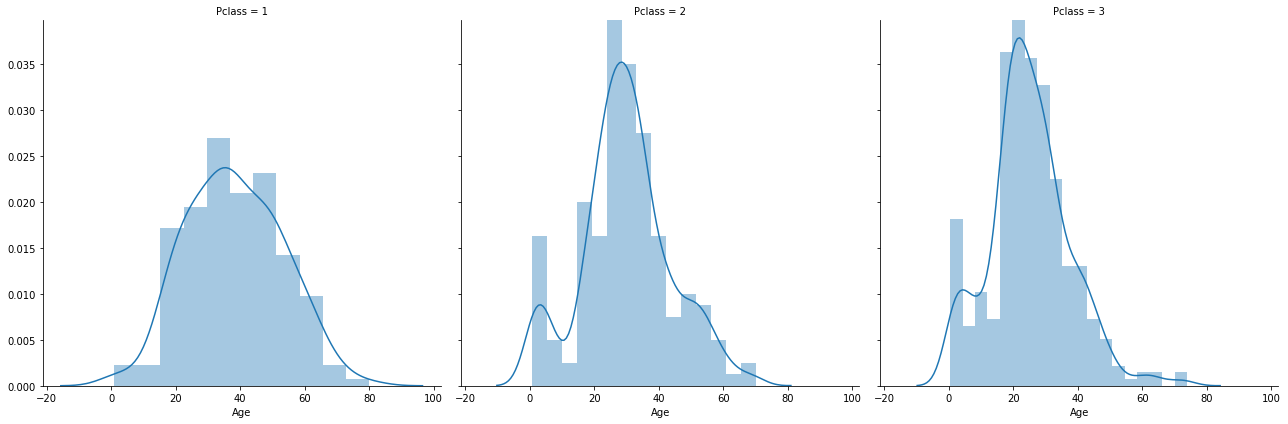

In [31]:
g = sns.FacetGrid(data = df_train, col = 'Pclass', size=6)
g.map(sns.distplot, 'Age')

In [32]:
df_train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [33]:
def age_marking(val):
    if pd.isnull(val[1]):
        if val[0] == 1:
            return 38
        elif val[0] == 2:
            return 30
        else:
            return 25
    else:
        return val[1]

In [34]:
df_train['Age'] = df_train[['Pclass','Age']].apply(age_marking, axis=1)

In [35]:
df_test['Age'] = df_test[['Pclass','Age']].apply(age_marking, axis =1)

In [38]:
#We have pretty much maintained the same average

In [39]:
df_train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.201019
2    29.884946
3    25.101670
Name: Age, dtype: float64

In [42]:
#We have 2 Null values in Embarked
#These passengers travelled together(same ticket number) and Survived
#We could research and try filling the Embarked column
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [44]:
ticket = []
for k,i in enumerate(df_train['Ticket'],0):
    if ((i[0] == '1') & (i[1] == '1') & (i[2] == '3')):
        ticket.append(k)

In [49]:
df_train.loc[ticket].groupby(['Embarked'])['Embarked'].count()

Embarked
C     4
S    41
Name: Embarked, dtype: int64

In [50]:
#Since we have 41 out of 45 passengers who embarked from 'S' with ticket number beginning with '113'
#we could presume the 2 passengers embarked from 'S' as well

In [51]:
df_train.loc[[61,829],'Embarked'] = 'S'

In [52]:
#Discarding the following features: PassengerID, Name, SibSp, Parch, Ticket and Cabin
#I have brute forced my way through this entire project, trying all features
#I shall explain in the end why I decided to discard each feature

In [53]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1, inplace=True)

In [55]:
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1, inplace=True)

In [ ]:
#We still have 1 Null value in test data

In [58]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        1
Embarked    0
dtype: int64

In [59]:
df_test[df_test['Fare'].isnull()]

,Pclass,Sex,Age,Fare,Embarked
152,3,male,60.5,NaN,S


In [60]:
#Filling the value with Pclass 3 average

In [62]:
df_train[df_train['Pclass'] == 3]['Fare'].mean()

13.675550101832997

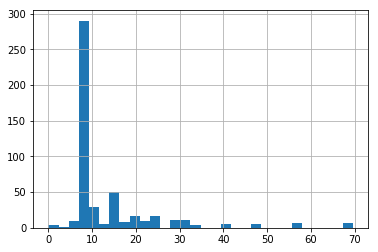

In [67]:
df_train[df_train['Pclass'] == 3]['Fare'].hist(bins=30)

In [69]:
df_test['Fare'].fillna(14,inplace=True)

In [71]:
#One hot encoding Sex and Embarked

In [72]:
def ohe(df,col):
    x = pd.get_dummies(df[col], drop_first=True)
    df[x.columns] = x
    df.drop(col, axis=1, inplace=True)

In [73]:
ohe(df_train, 'Sex')

In [75]:
ohe(df_train, 'Embarked')
ohe(df_test, 'Sex')
ohe(df_test, 'Embarked')

In [76]:
df_train.head(2)

,Survived,Pclass,Age,Fare,male,Q,S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0


In [77]:
df_test.head(2)

,Pclass,Age,Fare,male,Q,S
0,3,34.5,7.8292,1,1,0
1,3,47.0,7.0000,0,0,1


In [78]:
#Binning Age column into 10 categories

In [79]:
q = []
for i in range(1,11):
    q.append('Q'+str(i))

In [80]:
df_train['New_Age'],bins = pd.qcut(df_train['Age'], 10,labels=q, retbins=True, precision=True, duplicates='raise')

In [82]:
df_test['New_Age'] = pd.cut(df_test['Age'], labels=q, bins=bins)

In [ ]:
#Following is the survival rate against each bin
#Mapping the survival rate on the 'New_Age' column

In [88]:
df_train.groupby(['New_Age'])['Survived'].mean()

New_Age
Q1     0.550000
Q2     0.341772
Q3     0.367347
Q4     0.250000
Q5     0.333333
Q6     0.396040
Q7     0.434783
Q8     0.471910
Q9     0.329545
Q10    0.415730
Name: Survived, dtype: float64

In [89]:
age_mapping = df_train.groupby(['New_Age'])['Survived'].mean().to_dict()

In [92]:
df_train['New_Age'] = df_train['New_Age'].map(age_mapping)
df_test['New_Age'] = df_test['New_Age'].map(age_mapping)

In [93]:
#Deleting Age column
df_train.drop(['Age'],axis=1, inplace=True)
df_test.drop(['Age'],axis=1, inplace=True)

In [94]:
df_train.head(2)

,Survived,Pclass,Fare,male,Q,S,New_Age
0,0,3,7.2500,1,0,1,0.367347
1,1,1,71.2833,0,0,0,0.471910


In [95]:
df_test.head(2)

,Pclass,Fare,male,Q,S,New_Age
0,3,7.8292,1,1,0,0.471910
1,3,7.0000,0,0,1,0.329545


In [97]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [98]:
svc = SVC(probability=True)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
adb = AdaBoostClassifier(learning_rate= 0.001)
gbc = GradientBoostingClassifier(learning_rate= 0.01)
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimators=5000, learning_rate=0.00001)
lr = LogisticRegression()

In [109]:
def evaluation(obj):
    obj.fit(df_train.drop(['Survived'], axis = 1), df_train['Survived'])
    pred = obj.predict(df_test)
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test['Survived'],pred))
    print ('\n')
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test['Survived'],pred))
    print ('\n')
    print('ACCURACY')
    print(accuracy_score(y_test['Survived'],pred))

In [110]:
#LOGISTIC REGRESSION
evaluation(lr)

CONFUSION MATRIX
[[255  11]
 [  6 146]]


CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       266
          1       0.93      0.96      0.94       152

avg / total       0.96      0.96      0.96       418



ACCURACY
0.959330143541


In [111]:
#SUPPORT VECTOR MACHINE
evaluation(svc)

CONFUSION MATRIX
[[236  30]
 [ 13 139]]


CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.95      0.89      0.92       266
          1       0.82      0.91      0.87       152

avg / total       0.90      0.90      0.90       418



ACCURACY
0.897129186603


In [112]:
#K-NEAREST NEIGHBOURS
evaluation(knn)

CONFUSION MATRIX
[[223  43]
 [ 47 105]]


CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.83      0.84      0.83       266
          1       0.71      0.69      0.70       152

avg / total       0.78      0.78      0.78       418



ACCURACY
0.784688995215


In [113]:
#DECISION TREE
evaluation(dtc)

CONFUSION MATRIX
[[231  35]
 [ 43 109]]


CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.84      0.87      0.86       266
          1       0.76      0.72      0.74       152

avg / total       0.81      0.81      0.81       418



ACCURACY
0.813397129187


In [114]:
#RANDOM FOREST
evaluation(rfc)

CONFUSION MATRIX
[[231  35]
 [ 32 120]]


CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.88      0.87      0.87       266
          1       0.77      0.79      0.78       152

avg / total       0.84      0.84      0.84       418



ACCURACY
0.83971291866


In [115]:
#ADABOOST
evaluation(adb)

CONFUSION MATRIX
[[266   0]
 [  0 152]]


CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       266
          1       1.00      1.00      1.00       152

avg / total       1.00      1.00      1.00       418



ACCURACY
1.0


In [116]:
#GRADIENT BOOST
evaluation(gbc)

CONFUSION MATRIX
[[264   2]
 [ 41 111]]


CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.87      0.99      0.92       266
          1       0.98      0.73      0.84       152

avg / total       0.91      0.90      0.89       418



ACCURACY
0.897129186603


In [118]:
#XG BOOST
evaluation(xgb_clf)

CONFUSION MATRIX
[[266   0]
 [  6 146]]


CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       266
          1       1.00      0.96      0.98       152

avg / total       0.99      0.99      0.99       418



ACCURACY
0.985645933014


### Feature engineering techniques that did not work

In [ ]:
#Fare - Equal frequency discretisation

#Split the age column into 10 bins of equal distribution and calculated the Survival rate against each bin
#Decreased the XGBoost precision from 99 to 92
#I believe this is because the Fare distribution is left skewed, unlike the Age

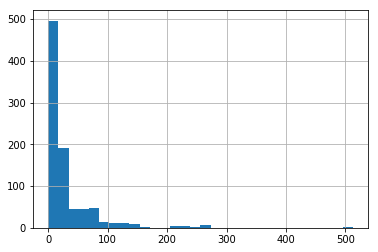

In [121]:
df_train['Fare'].hist(bins=30)

In [ ]:
#Cabin - Replacing Null values with string 'Missing'

#Replacing all the NA values with string 'Missing'
#Creating a new column which contains only the first letter from feature 'Cabin'
#This new feature has less cardinality compared to the original feature 'Cabin' - ['A','B','C','D','E','F','P']
#Tried Mean Encoding and Probability ratio encoding
#Decreased the XGBoost precision from 99 to 98

In [122]:
#SibSp and Parch

#Calculated the Survival rate against each variable.
#Didn't seem to increase the precision

In [ ]:
#PassengerId and Name

#No techniques implemented